In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pose
from pose_parser import parse_file


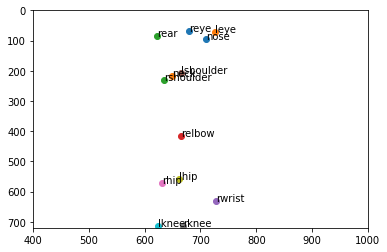

In [2]:
#UNnormalized raw data plot
JOINT_NAMES = ['nose', 'neck',  'rshoulder', 'relbow', 'rwrist', 'lshoulder', 'lelbow',
    'lwrist', 'rhip', 'rknee', 'rankle', 'lhip', 'lknee', 'lankle', 'reye', 'leye', 'rear', 'lear']
sequence = np.load(file="dataset/bicep/bicep_good_1.npy")
joints = sequence[0]
plt.xlim([400, 1000])
plt.ylim([0,720])        # invert the axis
ax=plt.gca()                            # get the axis
ax.invert_yaxis()
for i, joint in enumerate(joints):
    if joint[2] == 0:
        continue
    plt.plot(joint[0], joint[1], '-o')

    plt.text(joint[0]+.03, joint[1]+.03, JOINT_NAMES[i])
plt.show()


In [3]:
#Parse and normalize the data
bicep_sequence = parse_file("dataset/bicep/bicep_good_1.npy")
print(len(bicep_sequence))
frame0 = bicep_sequence[0]
frame50 = bicep_sequence[50]
print(frame0)
    

Data shape:  (114, 18, 3)
Mean torso:  360.11485467535044
114
nose <1.9708212276881114, 0.26258344739832407, 0.835979>
neck <1.8021833633746602, 0.6053263206721059, 0.584495>
rshoulder <1.763887248063247, 0.6434558224733541, 0.613341>
relbow <1.845452891964497, 1.1546371792267567, 0.54861>
rwrist <2.0198889064316887, 1.7531906607106573, 0.78617>
lshoulder <1.845719473580761, 0.5780572428417762, 0.333104>
lelbow <0.0, 0.0, 0.0>
lwrist <0.0, 0.0, 0.0>
rhip <1.7532267603045266, 1.5844972585604844, 0.261292>
rknee <1.8565076983639413, 1.987218773980178, 0.137317>
rankle <0.0, 0.0, 0.0>
lhip <1.8347313125853828, 1.551885440837532, 0.124535>
lknee <1.731453151417804, 1.9871632361434566, 0.101476>
lankle <0.0, 0.0, 0.0>
reye <1.8891583925725985, 0.19182796572575952, 0.935494>
leye <2.0141213020881454, 0.19704741162086012, 0.914553>
rear <1.7261881644965915, 0.235362132107575, 0.886749>
lear <0.0, 0.0, 0.0>


In [4]:
#Plot a frame
def plotFrame(frame):
    i = 0
    x = [joint.x for name, joint in frame]
    y = [joint.y for name, joint in frame]
    plt.scatter(x,y)
    ax=plt.gca()                            # get the axis
    ax.invert_yaxis()
    for x0, y0 in zip(x,y):
        plt.plot(x0, y0, '-o')

        plt.text(x0+.03, y0+.03, JOINT_NAMES[i])
        i += 1 
    plt.show()

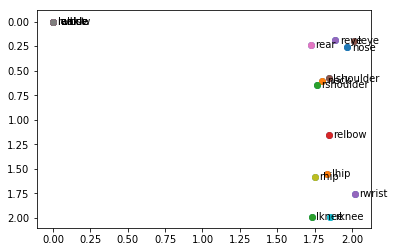

In [5]:
plotFrame(frame0)

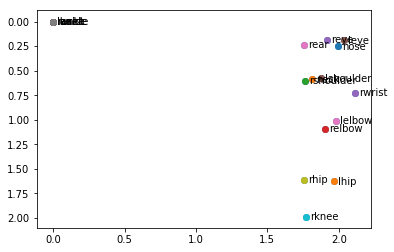

In [6]:
plotFrame(frame50)

In [7]:
#Perspective detection
right, left = 0,0
for pose in bicep_sequence:
    rloc = [pose.rshoulder, pose.relbow, pose.rwrist]
    lloc = [pose.lshoulder, pose.lelbow, pose.lwrist]
    for loc in rloc:
        right += 1 if loc.confidence > 0 else 0
    for loc in lloc:
        left += 1 if loc.confidence > 0 else 0
print(right, left)    
side = "Right" if (right > left) else "Left"
print(side)

342 134
Right


In [8]:
shoulders = []
elbows = []
wrists = []
for i, frame in enumerate(bicep_sequence):
    rs = frame.rshoulder
    re = frame.relbow
    rw = frame.rwrist
    print("Frame:", i, rw.x, rw.y)

Frame: 0 2.0198889064316887 1.7531906607106573
Frame: 1 2.0195834483297195 1.758400109795148
Frame: 2 2.0195834483297195 1.7584084404706564
Frame: 3 2.01428791559831 1.7583890022278037
Frame: 4 1.9978931461980793 1.7584167711461645
Frame: 5 1.9926198286013588 1.758500077901247
Frame: 6 1.9326084191317807 1.5192958382492683
Frame: 7 1.9980430983572277 1.758461201415542
Frame: 8 2.014321238300343 1.753243421655543
Frame: 9 2.0195251336011615 1.7530184934168203
Frame: 10 2.0305132945965396 1.7423580056580996
Frame: 11 2.052447963209755 1.7313559602035409
Frame: 12 2.0687233262610345 1.7206926955529844
Frame: 13 1.9816177831468 1.5029538297939231
Frame: 14 1.9816566596325051 1.4757569511513315
Frame: 15 2.014199055059555 1.4757236284492985
Frame: 16 2.0196334323827685 1.4702975818015935
Frame: 17 2.04142925640418 1.4702559284240522
Frame: 18 2.0307409997270987 1.4375941266480503
Frame: 19 2.05240908672405 1.4267836867301815
Frame: 20 2.036075408944213 1.399528493359032
Frame: 21 2.28652050